Transformaciones.

OpenCV proporciona dos funciones de transformación, cv.warpAffine y cv.warpPerspective , con las que puedes realizar todo tipo de transformaciones. cv.warpAffine toma una matriz de transformación de 2x3 mientras que cv.warpPerspective toma una matriz de transformación de 3x3 como entrada.

Escalada.

Escalar es simplemente cambiar el tamaño de la imagen. OpenCV viene con una función cv.resize() para este propósito. El tamaño de la imagen se puede especificar manualmente o puede especificar el factor de escala. Se utilizan diferentes métodos de interpolación. Los métodos de interpolación preferibles son cv.INTER_AREA para reducir y cv.INTER_CUBIC (lento) y cv.INTER_LINEAR para hacer zoom. De forma predeterminada, el método de interpolación cv.INTER_LINEAR se utiliza para todos los propósitos de cambio de tamaño. Puede cambiar el tamaño de una imagen de entrada con cualquiera de los siguientes métodos:

In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

Traducción:

La traducción es el cambio de ubicación de un objeto. Si conoce el desplazamiento en la dirección (x,y) y déjelo ser(tX,ty), puedes crear la matriz de transformación.

In [2]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/dread/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/qt/plugins"


Rotación:

Para encontrar esta matriz de transformación, OpenCV proporciona una función, cv.getRotationMatrix2D . Consulte el siguiente ejemplo que gira la imagen 90 grados con respecto al centro sin ninguna escala.

In [3]:
img = cv.imread('resources/messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

Transformacion afin:

En la transformación afín, todas las líneas paralelas de la imagen original seguirán siendo paralelas en la imagen de salida. Para encontrar la matriz de transformación, necesitamos tres puntos de la imagen de entrada y sus ubicaciones correspondientes en la imagen de salida. Luego, cv.getAffineTransform creará una matriz de 2x3 que se pasará a cv.warpAffine .

Consulte el siguiente ejemplo y observe también los puntos que seleccioné (que están marcados en color verde):

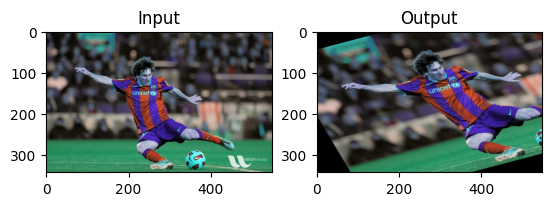

In [5]:
from matplotlib import pyplot as plt
img = cv.imread('resources/messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Transformación de perspectiva:

Para la transformación de perspectiva, necesita una matriz de transformación de 3x3. Las líneas rectas seguirán siendo rectas incluso después de la transformación. Para encontrar esta matriz de transformación, necesita 4 puntos en la imagen de entrada y los puntos correspondientes en la imagen de salida. De estos 4 puntos, 3 de ellos no deberían ser colineales. Luego, la matriz de transformación se puede encontrar mediante la función cv.getPerspectiveTransform . Luego aplique cv.warpPerspective con esta matriz de transformación de 3x3.

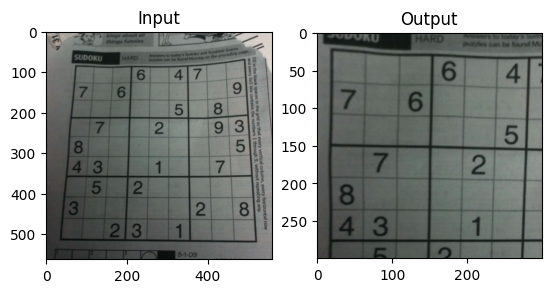

In [6]:
img = cv.imread('resources/sudoku.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()